# Summary of Results

Here is a quick rundown of the results for last week. I ended up finishing the revamp of the bundle code to accommodate having multiple strategies at working separately in tandem. This means that I can load the Linear Approximation Strategy along with multiple copes of the PCA strategy to increase the quality of our over approximation. This is what I experimented with first. What I did was add a PCA strategy which reorients itself every step along with other PCA strategies which reorient themselves every other step. More details are given below for each case.

Here is the strategy we first started off with i.e just the Linear App.strategy with one PCA template reorienting its directions every step. As we saw last week, this over approximation is quite crude.

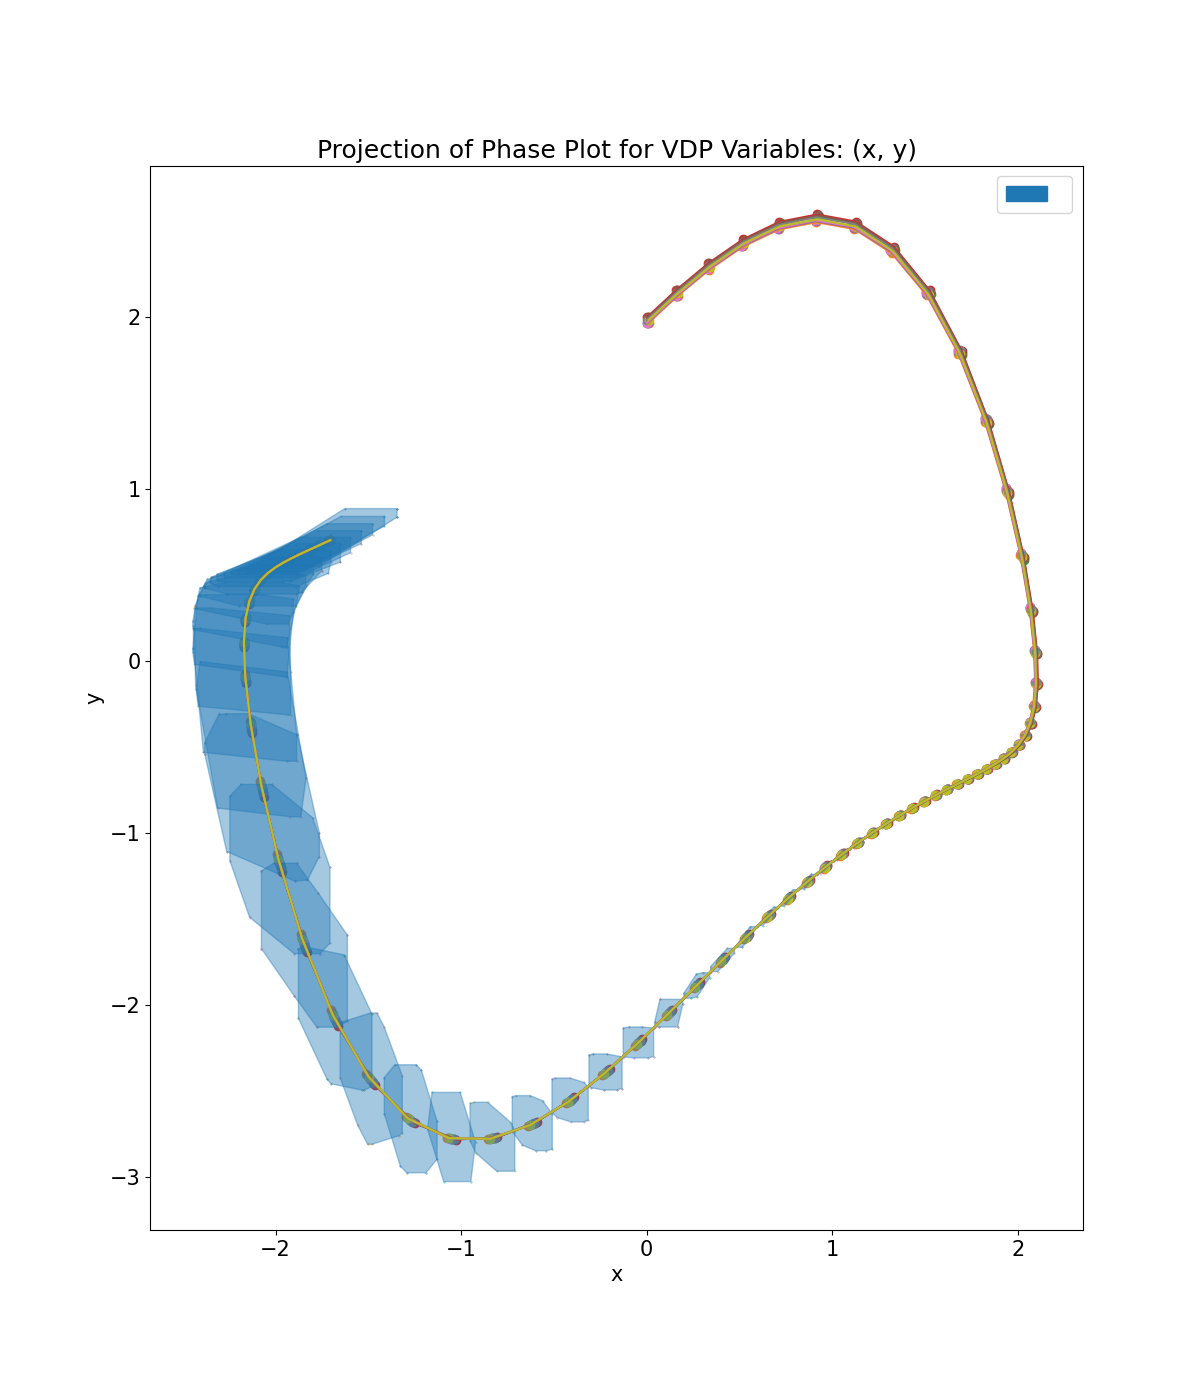

In [1]:
from IPython.display import Image
Image("figures/11:6:20/LinAppStrat.png")


# 2 PCA Templates with LinApp Template

I first started to experiment with having 2 PCA templates working independently of each other where one template reorients itself every step but the other reorients itself after n steps. This gives us **4** templates working at a time.

Here is the plot for the second PCA reorienting itself every **3 steps**:


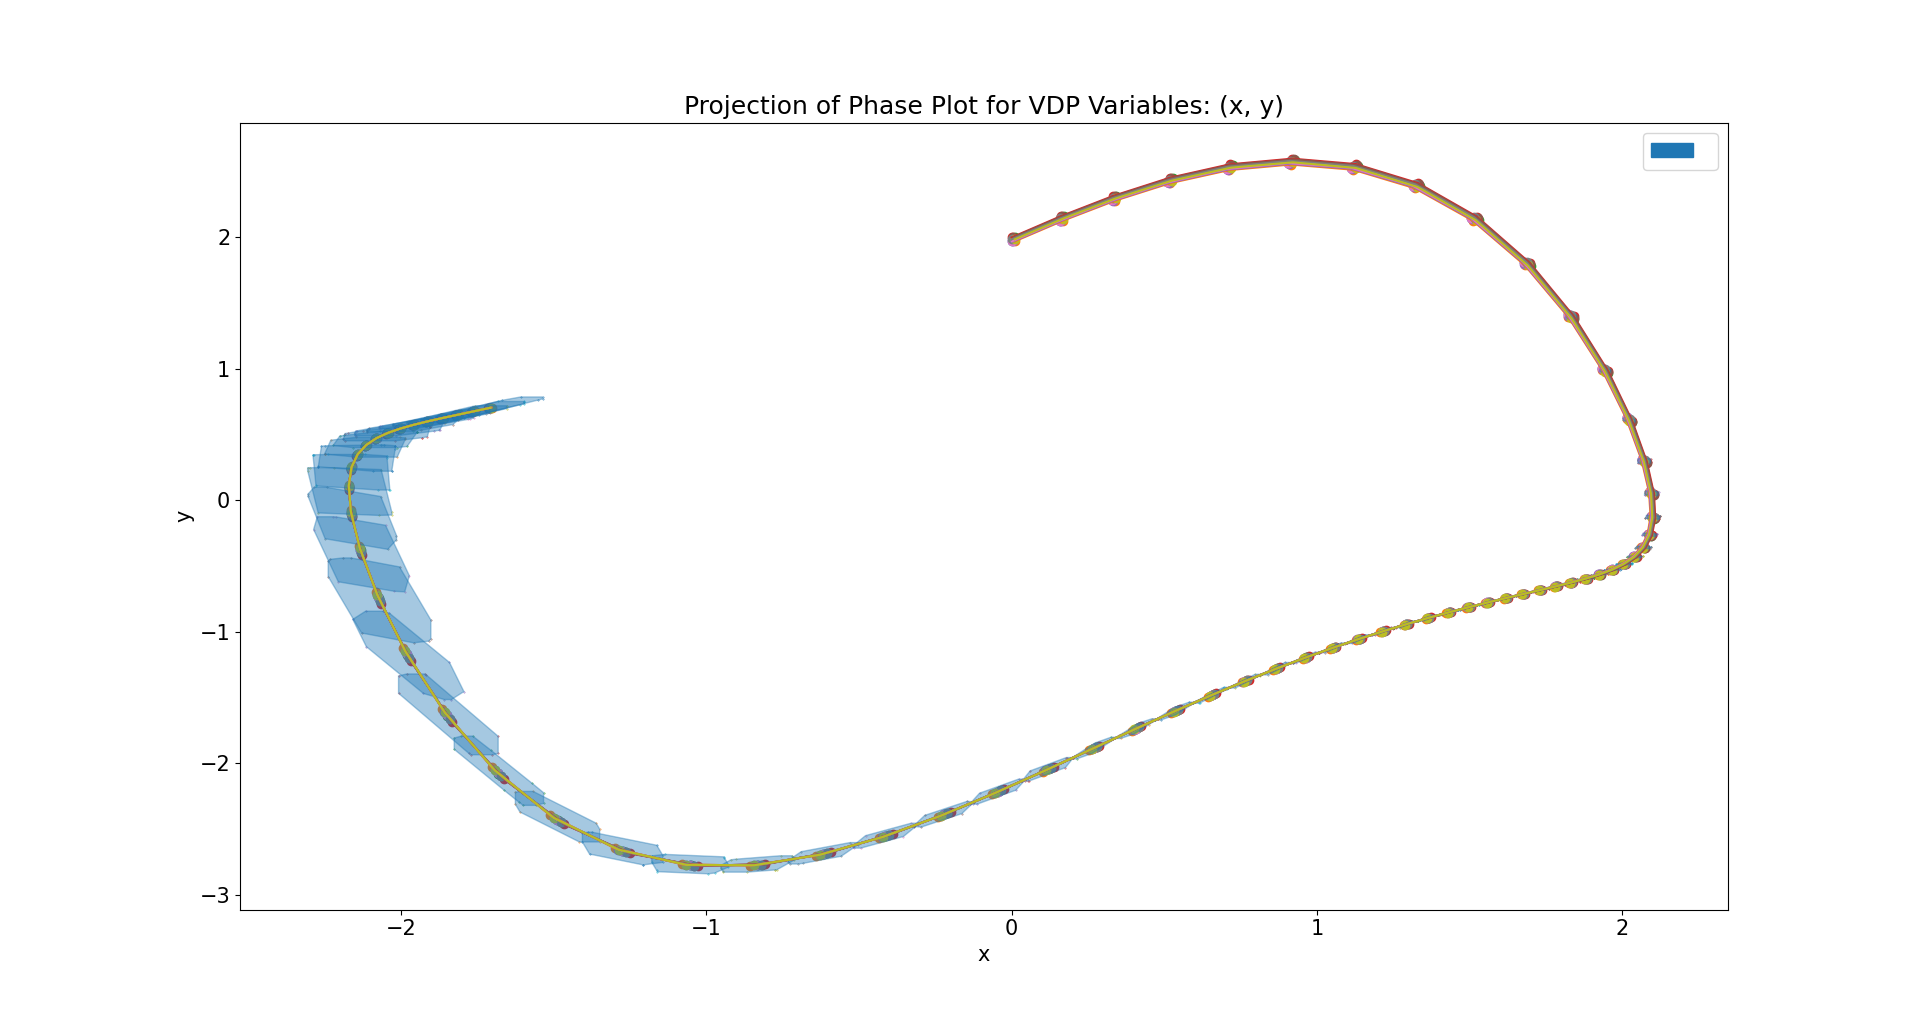

In [5]:
Image("figures/11:6:20/2PCATemp(2 steps apart).png")

Here is the plot for the second PCA reorienting itself every **5 steps**:


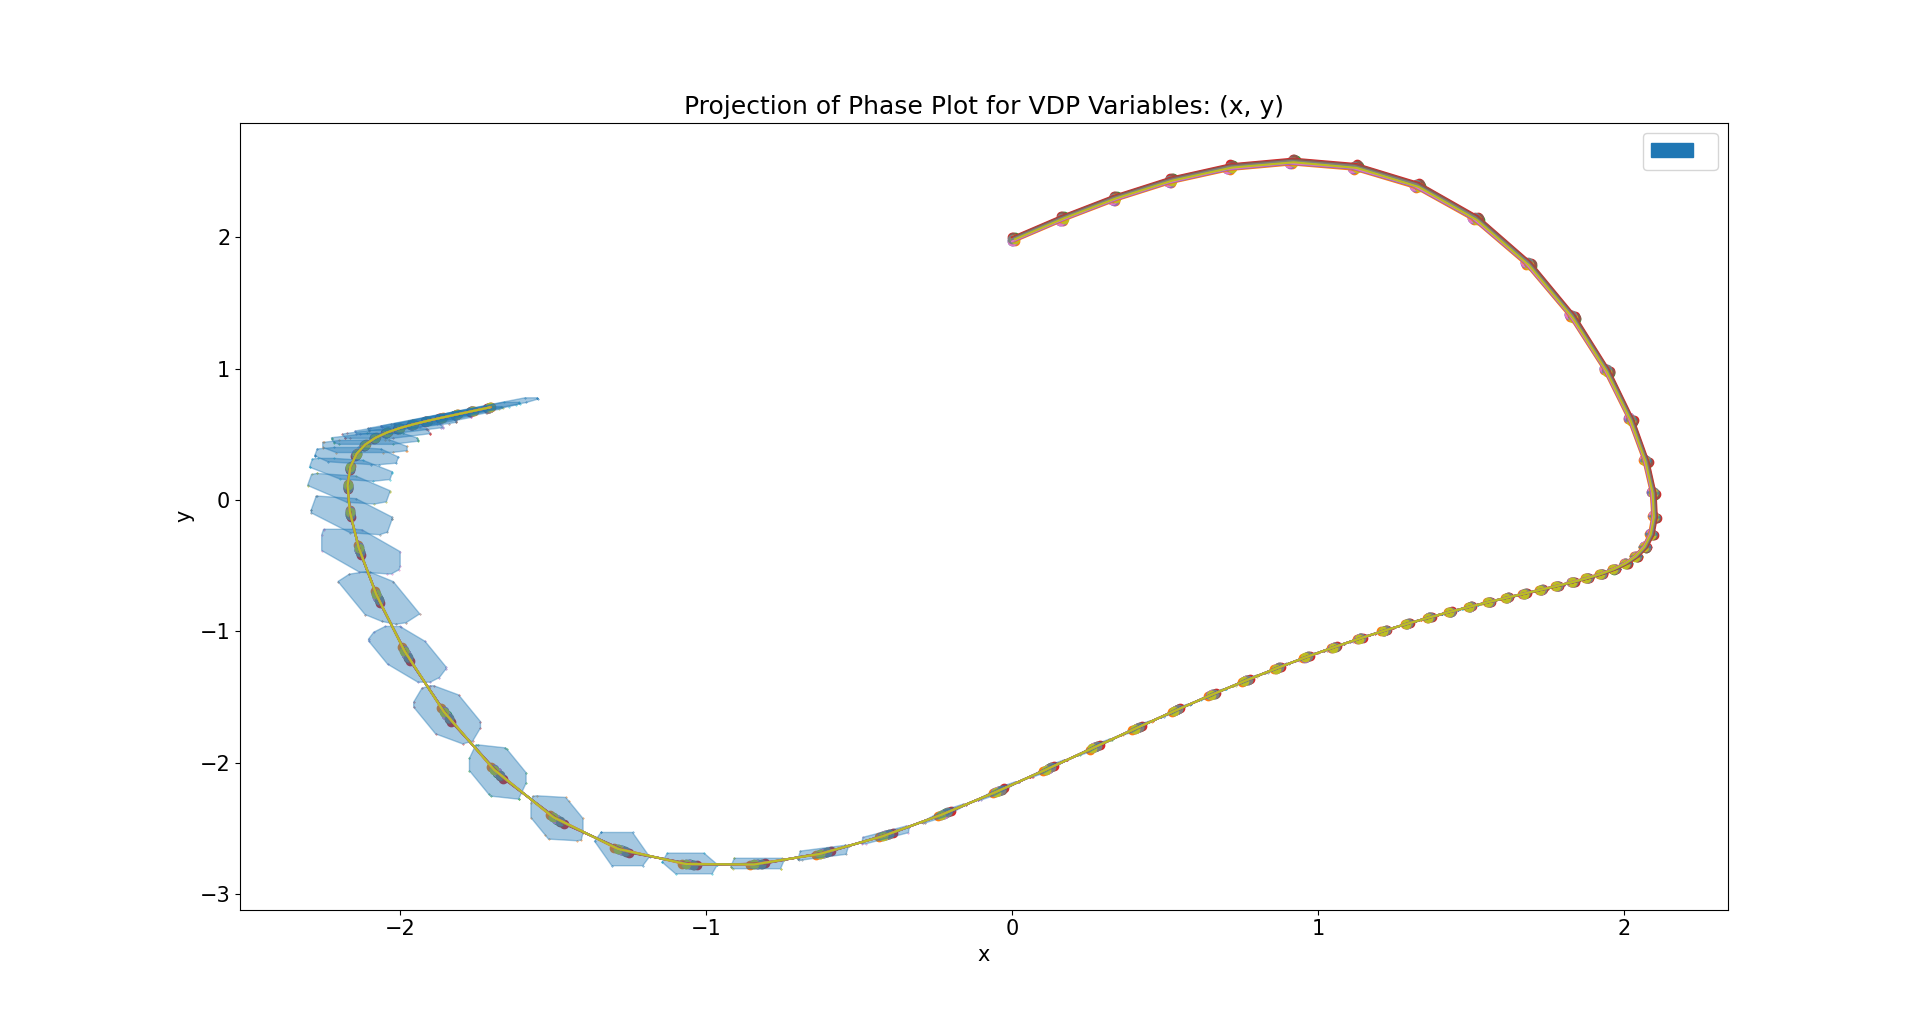

In [6]:
Image("figures/11:6:20/2PCA(4 steps apart).png")

Note that it seems that the quality of our reachable set increased with delaying the orientating routine for the second PCA template. 

Here is the plot for **8 steps**.

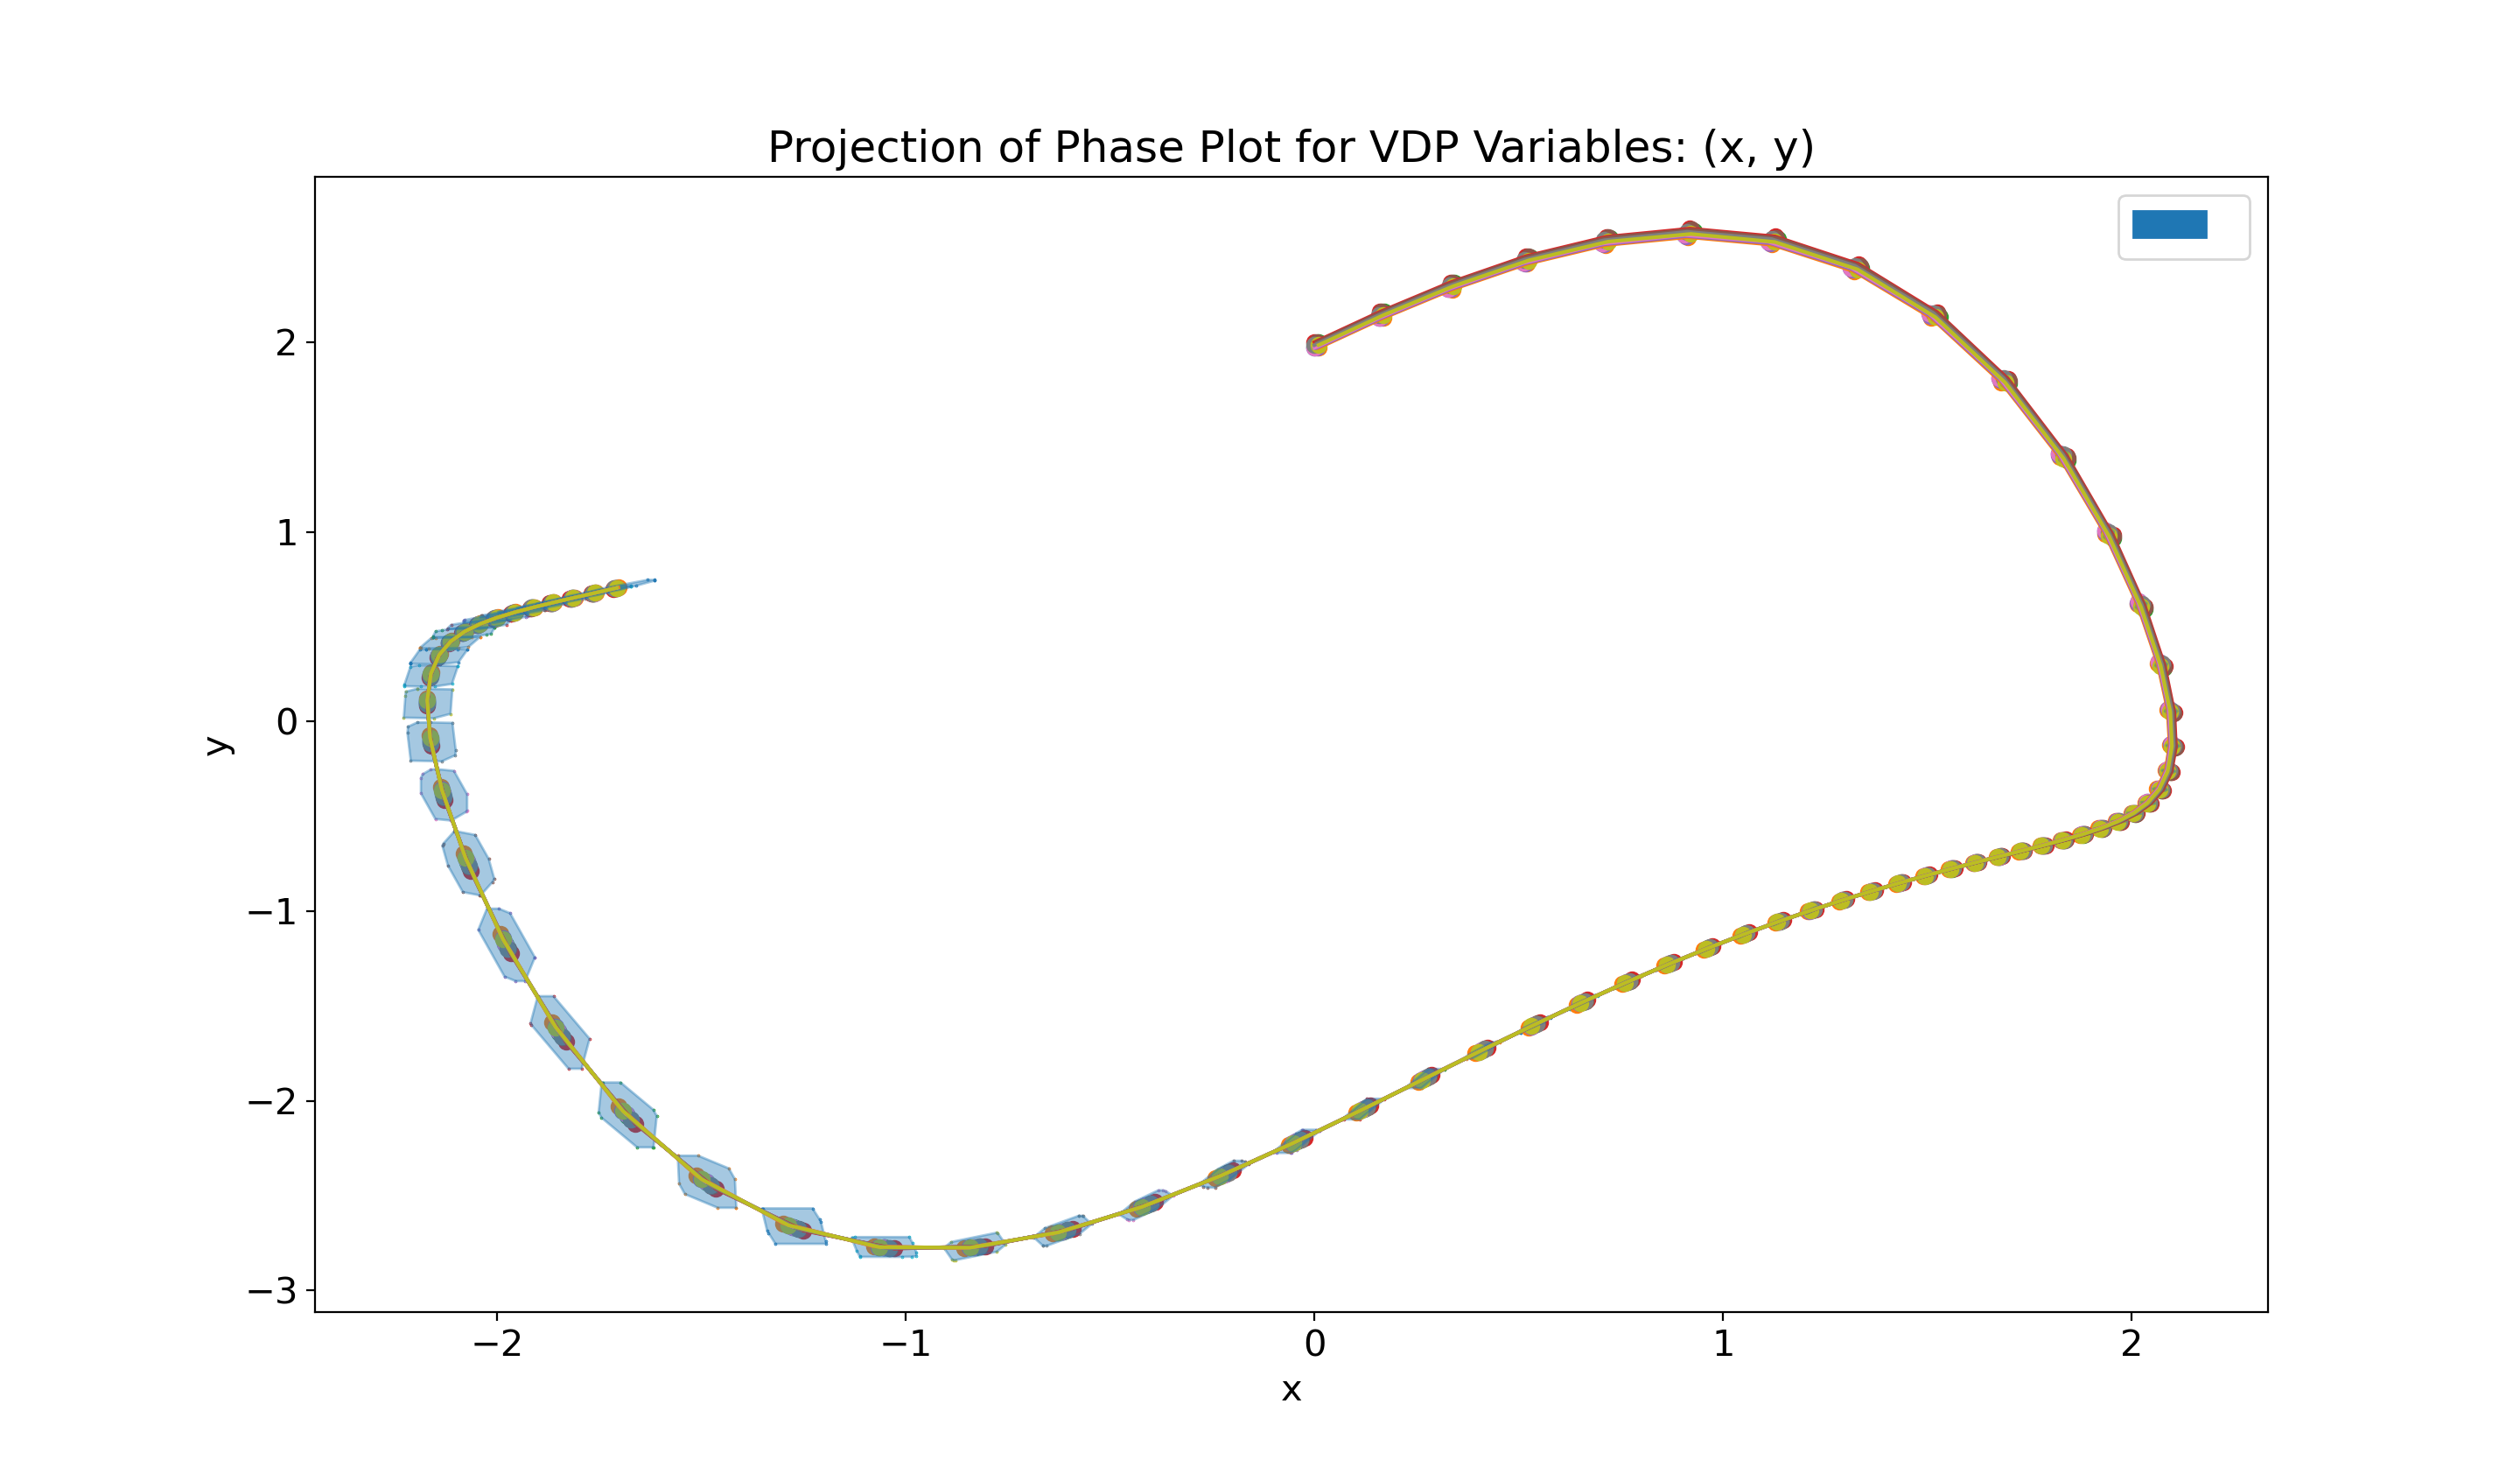

In [7]:
Image("figures/11:6:20/2PCATemp(7 steps apart).png")

Compare these with **Sapo** templates which uses **6 templates**.

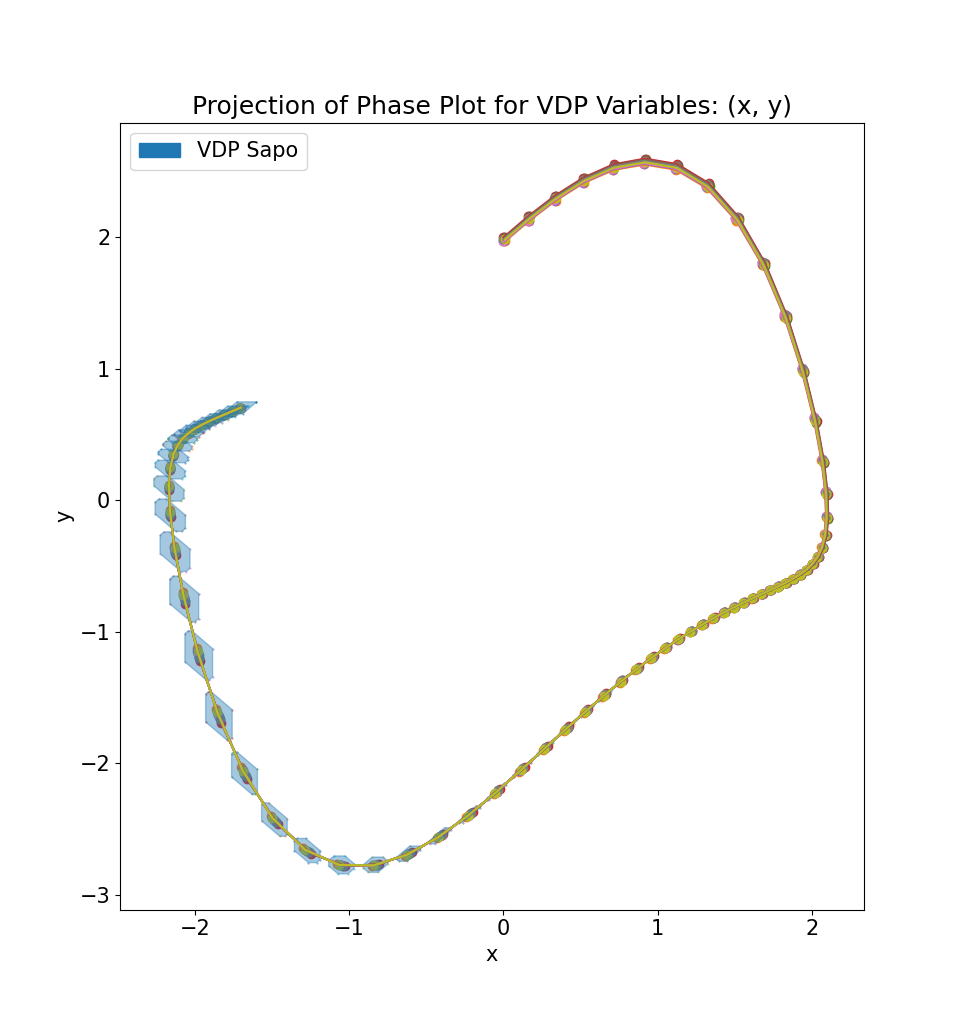

In [10]:
Image("figures/11:6:20/VDPSapo(0.08).png")

I believe there the accuracy of these two reachable sets are comparable. Recall that Sapo uses six templates which are esstentially combinations of the axis-aligned directions and the diagonal directions. We achieve a similar accuracy with four dynamic templates. Granted calculating these directions costs more compared to just using static templates, but I still think this is interesting in the context of using non-trivial directions to find good over-approximations. Perhaps finding a system where combinations of the axis-aligned and diagonal directions do worse than our scheme will make our case for dynamic templates stronger.

Below is the code which generated the plots above:

In [ ]:
from kaa.reach import ReachSet
from kaa.plotutil import Plot
from kaa.trajectory import Traj
from models.vanderpol import VanDerPol, VanDerPol_UnitBox

from kaa.temp.pca_strat import PCAStrat
from kaa.temp.lin_app_strat import LinStrat
from kaa.templates import MultiStrategy

from kaa.settings import PlotSettings
from kaa.timer import Timer

PlotSettings.save_fig = False

NUM_STEPS = 70
VDP_LIN_ITER_STEPS = 1 #Number of steps between each recomputation of LinApp Templates.
VDP_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
VDP_PCA_TRAJ_STEPS = 5 #Number of steps our sample trajectories should run.
VDP_PCA_NUM_TRAJ = 200 #Number of sample trajectories we should use for the PCA routine.
VDP_PCA_DELAY = 15

unit_model = VanDerPol_UnitBox(delta=0.08)
unit_mod_reach = ReachSet(unit_model)

lin_strat = MultiStrategy(LinStrat(unit_model, iter_steps=VDP_LIN_ITER_STEPS), \
                          PCAStrat(unit_model, traj_steps=VDP_PCA_TRAJ_STEPS, num_trajs=VDP_PCA_NUM_TRAJ, iter_steps=VDP_PCA_ITER_STEPS), \
                          PCAStrat(unit_model, traj_steps=VDP_PCA_TRAJ_STEPS, num_trajs=VDP_PCA_NUM_TRAJ, iter_steps=VDP_PCA_ITER_STEPS+VDP_PCA_DELAY))
                          #PCAStrat(unit_model, traj_steps=VDP_PCA_TRAJ_STEPS, num_trajs=VDP_PCA_NUM_TRAJ, iter_steps=VDP_PCA_ITER_STEPS+2*VDP_PCA_DELAY))
mod_lin_flow = unit_mod_reach.computeReachSet(NUM_STEPS, tempstrat=lin_strat)

points = [[0,1.97], [0.01, 1.97], [0.01,2], [0,2], [0.005,1.97], [0.005,2], [0,1.97],  [0,1.985], [0.01,1.985]]
trajs = [Traj(unit_model, point, NUM_STEPS) for point in points]

vdp_plot = Plot()
vdp_plot.add(mod_lin_flow)

'Add trajectories'
for traj in trajs:
    vdp_plot.add(traj)

vdp_plot.plot2DPhase(0,1, separate=False, plotvertices=True)

# 3 PCA Templates with LinApp Template

I then started to experiment with three PCA templates as follows: 

The plots for three PCA templates with directions recomputed every **1, 3, 5 steps**

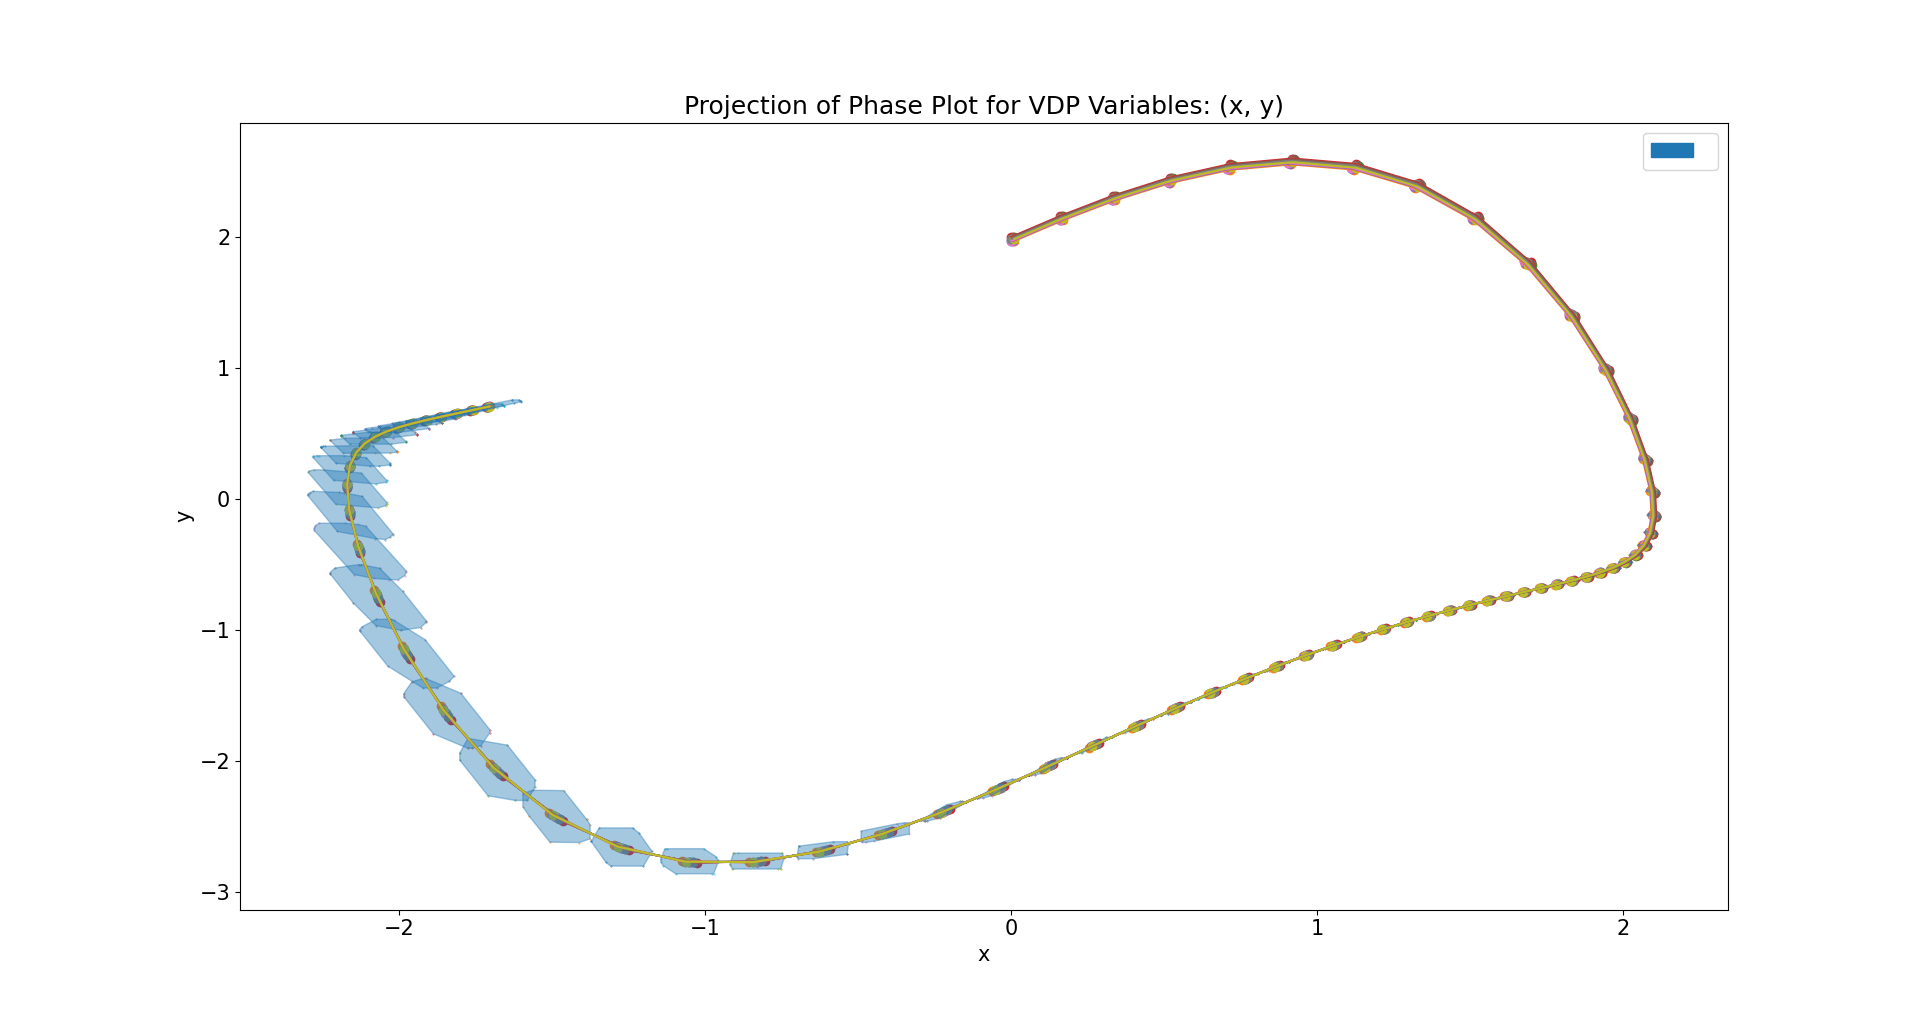

In [8]:
Image("figures/11:6:20/3PCA(1-3-5 steps apart)(2).png")

Interestingly enough, I did get this tight plot after one particular trial of this scheme. This seems to show how dependent the efficacy of the PCA templates are on the points which are sampled. Note that this scheme only uses three templates to achieve the bottom over approximation.


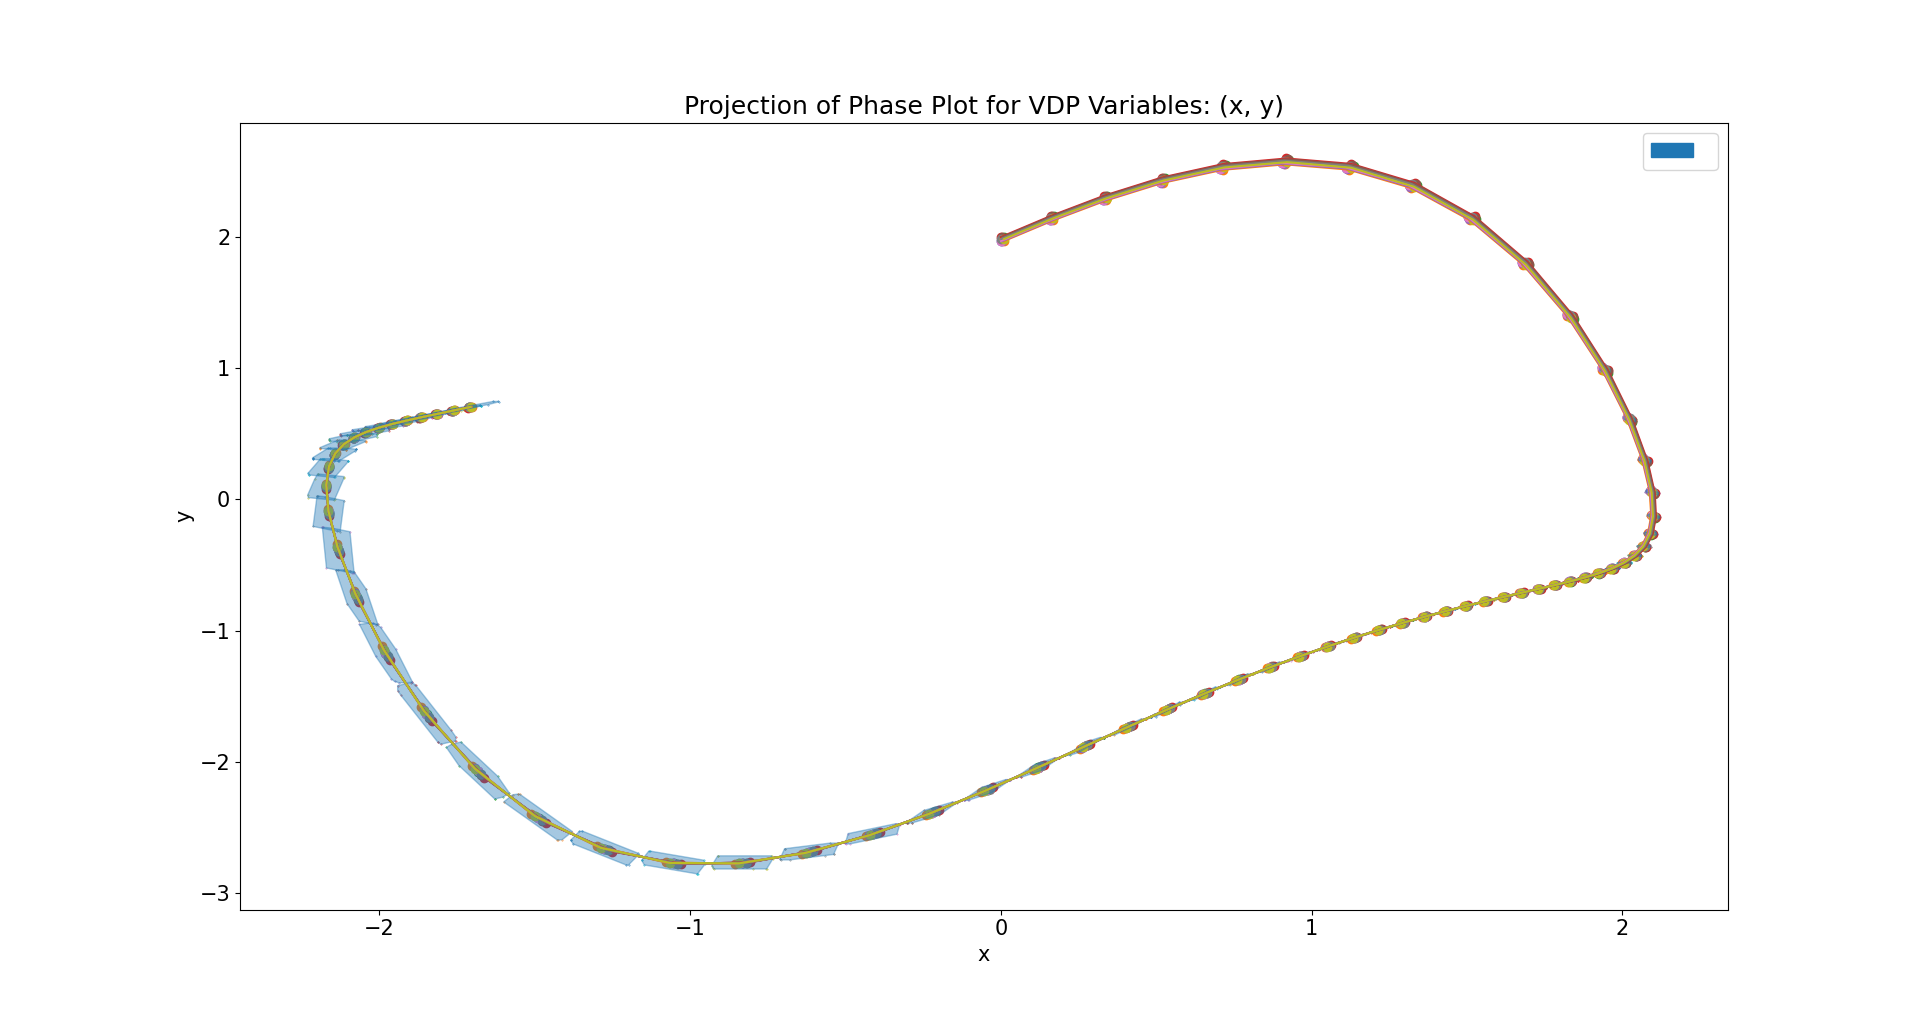

In [9]:
Image("figures/11:6:20/3PCA(1-3-5 steps apart).png")

I then tried to take the observation above from the 2 PCA experiments to good use. I increased the update steps to **1. 5, 9**:

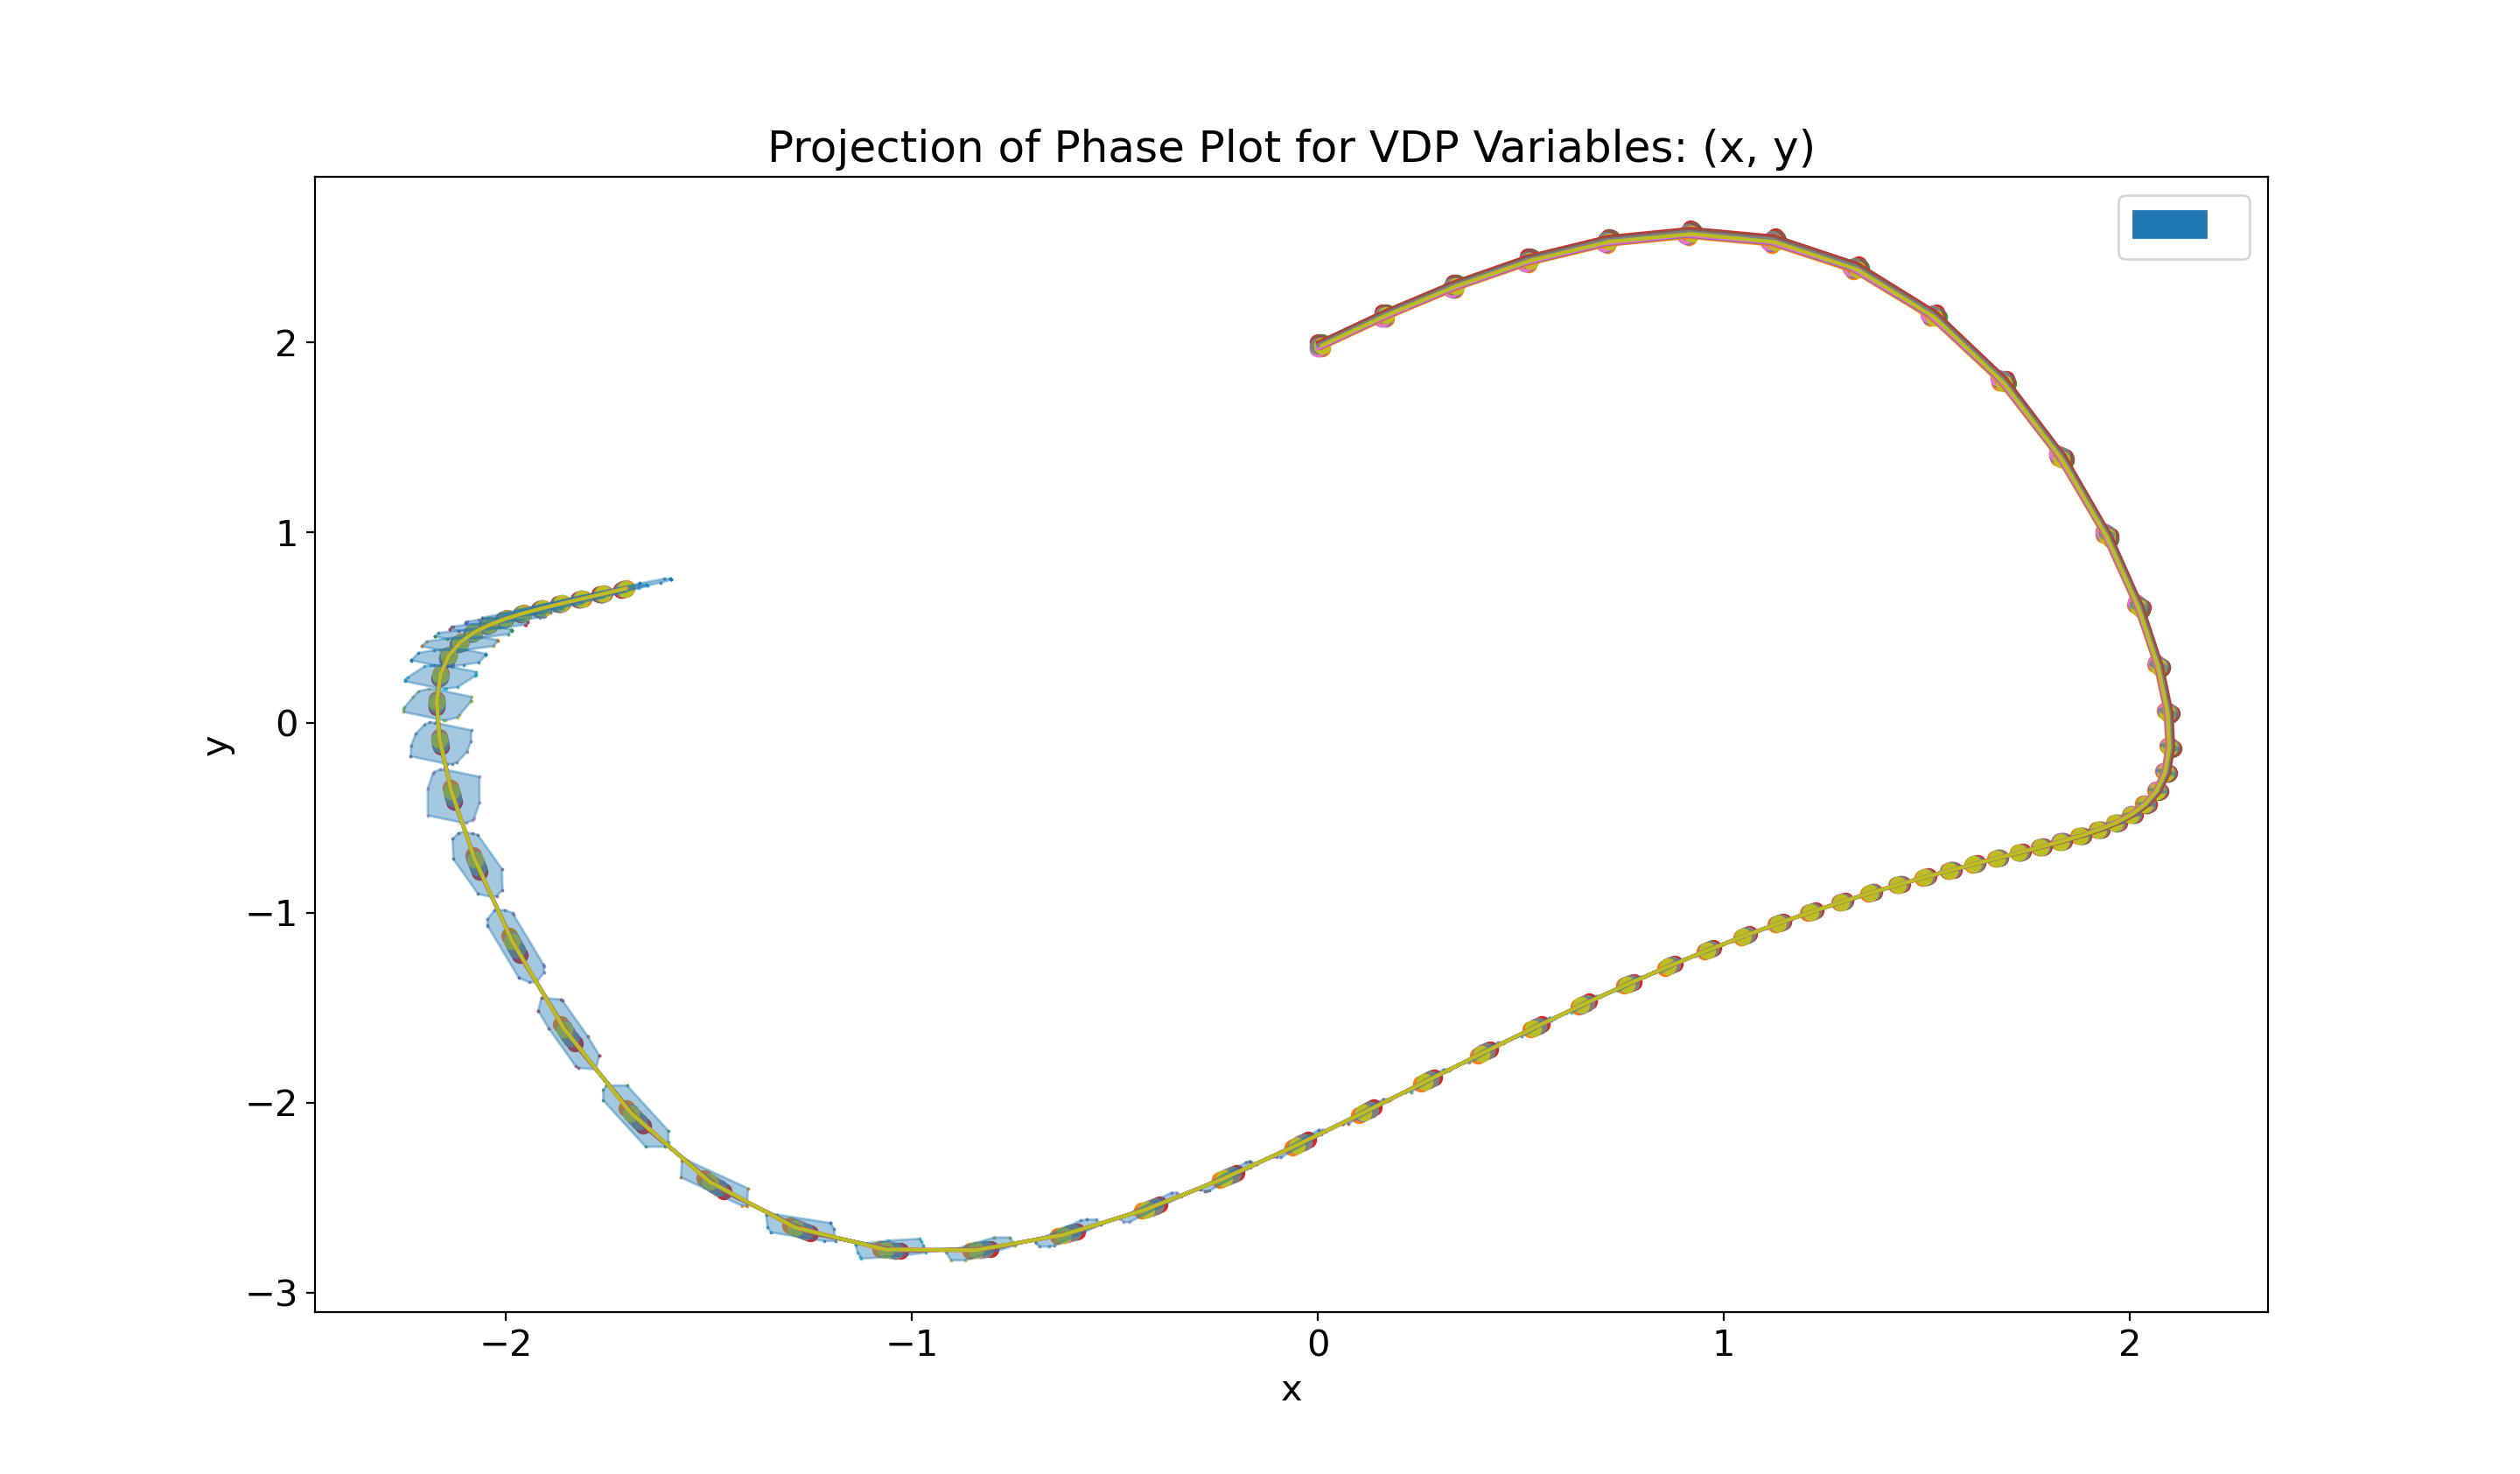

In [2]:
Image("figures/11:6:20/3PCA(1-5-9 steps apart)(2).png")

Here is another trial of the same experiment: 


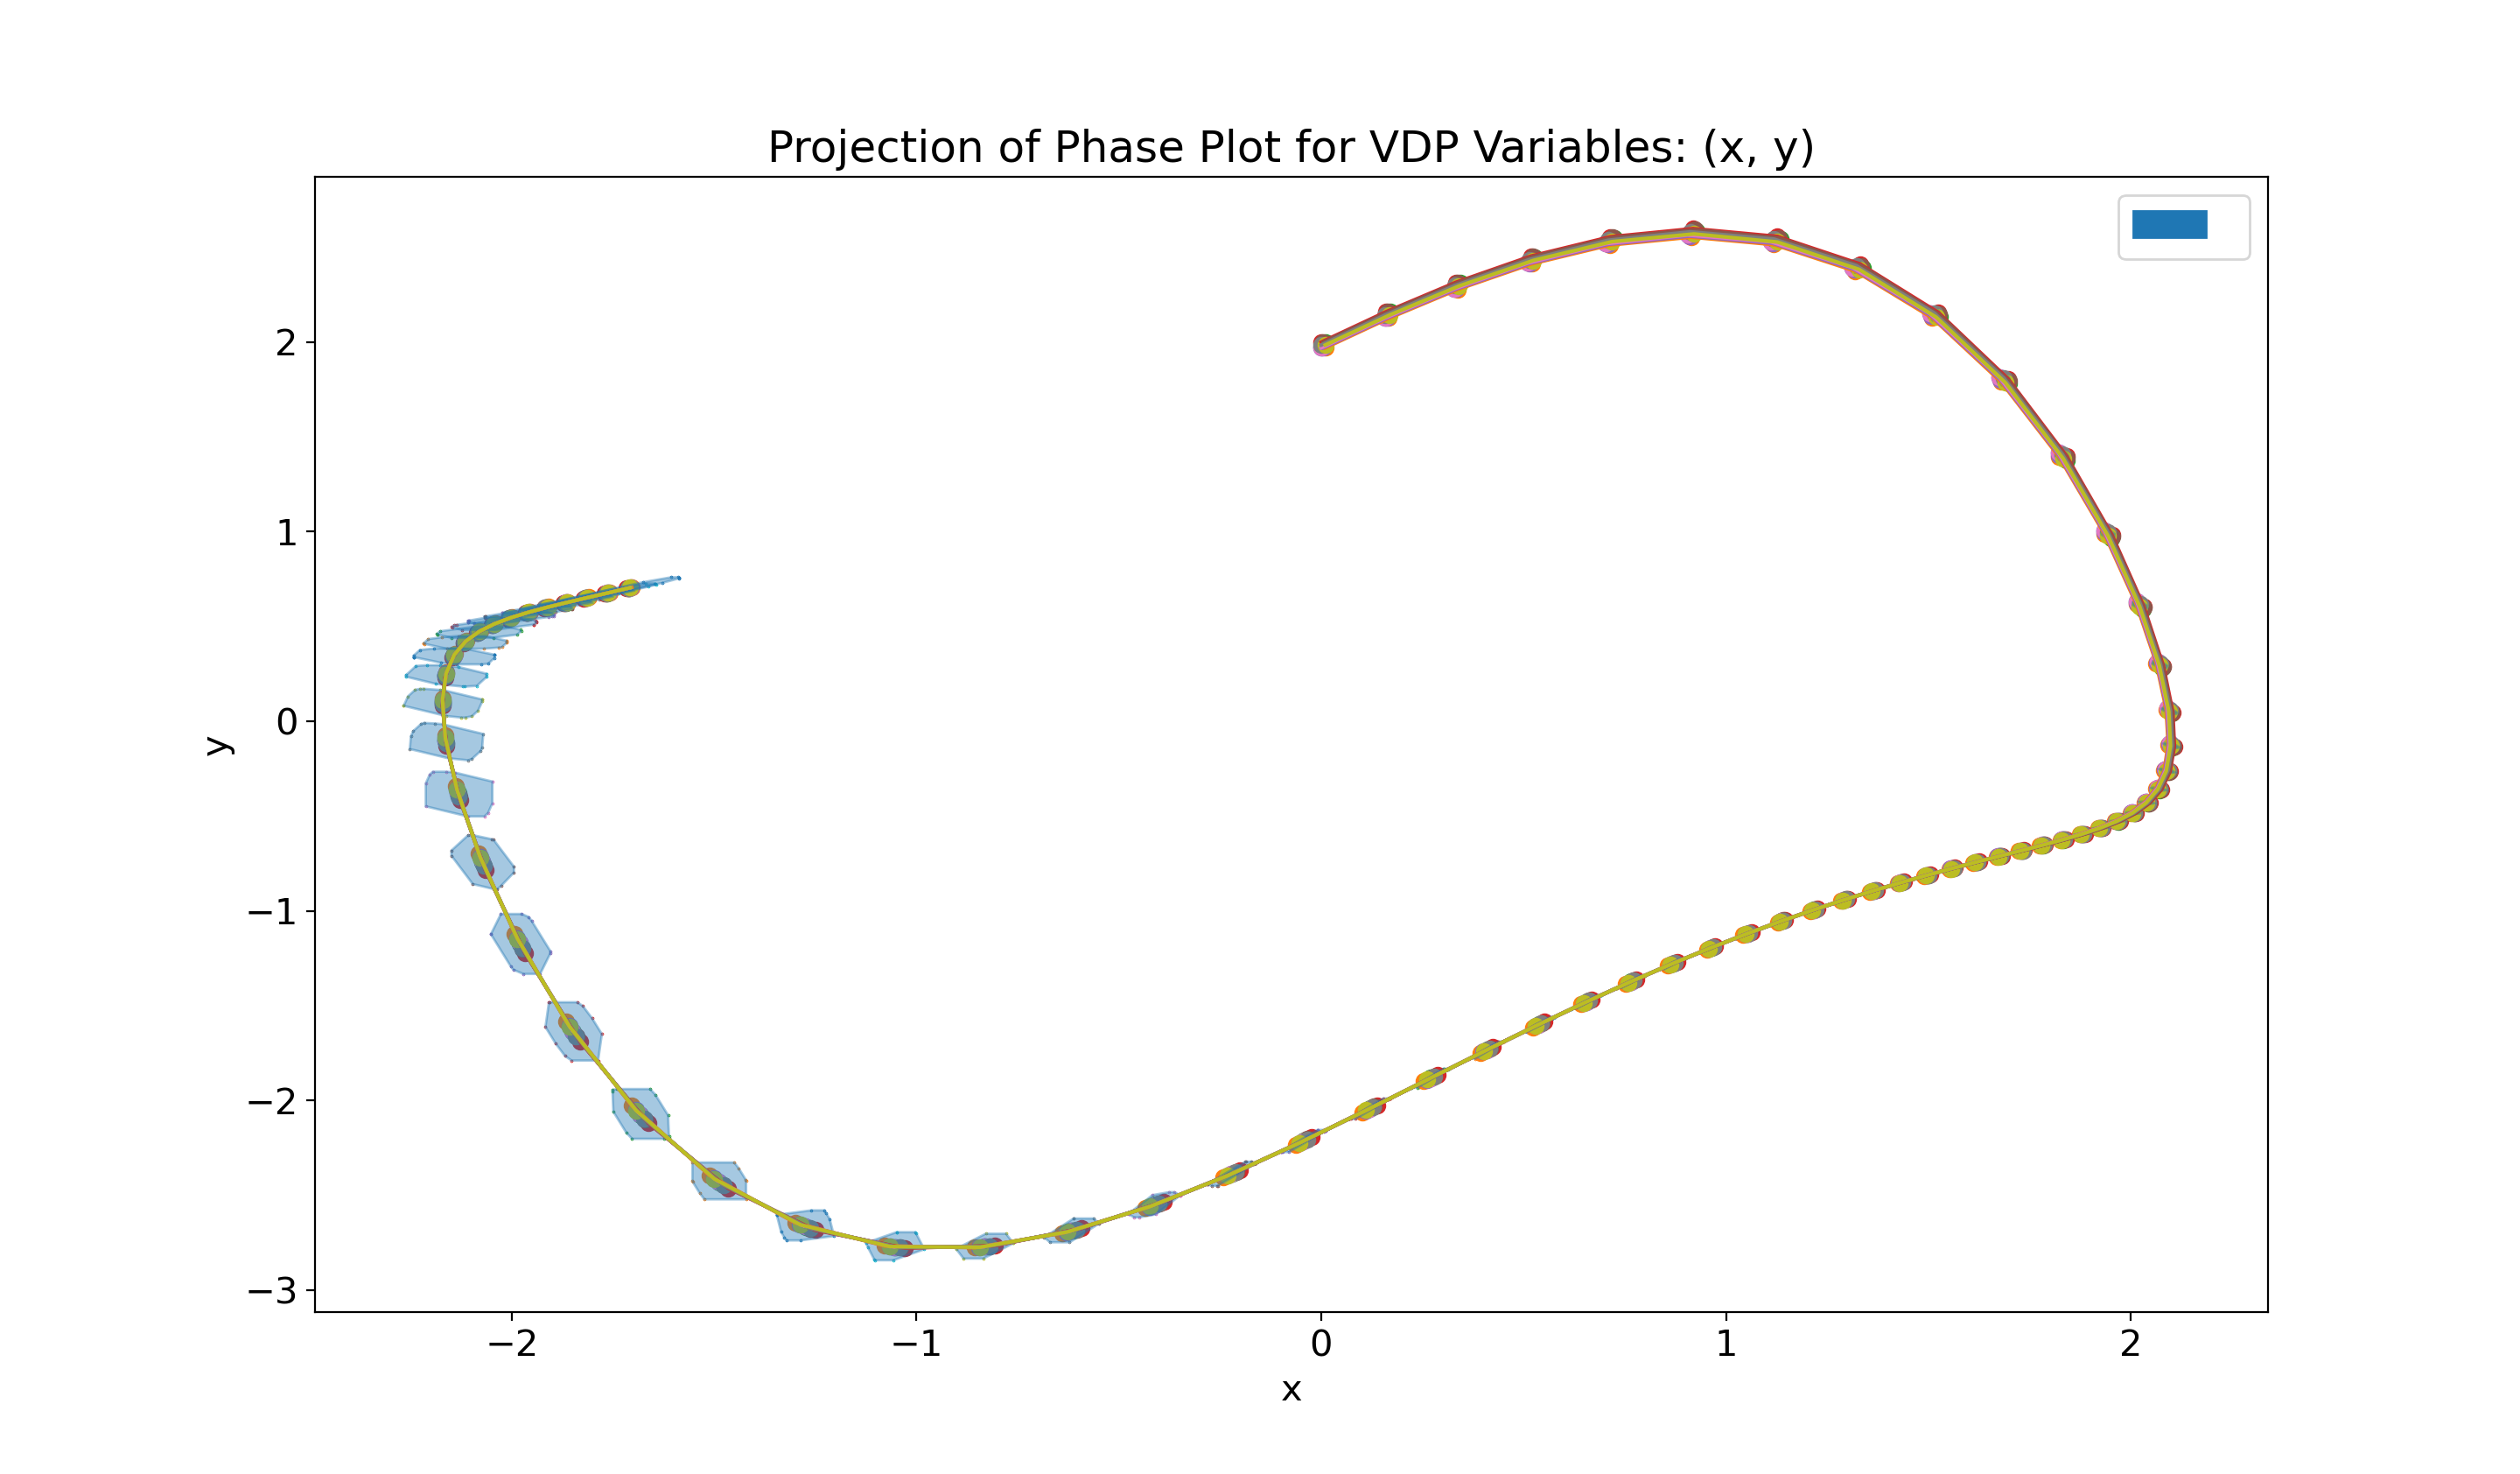

In [3]:
Image("figures/11:6:20/3PCA(1-5-9 steps apart).png")

I will try to see if we see similar behavior with other systems this week. Furthermore, as I mentioned above, I will try to find a system in which taking templates which are combinations of the axis-aligned and diagonal directions actually gives crude reachable sets.